In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("augmented_GSR_ECG_EEG_DATA(CTGAN).csv")

In [3]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 6:105].values

In [4]:
X

array([[-0.27751245, -0.02969867, -0.44623097, ...,  0.94661264,
         0.07743937,  0.8189292 ],
       [-0.30417424,  1.08884353,  0.25164327, ...,  0.58898326,
         0.72115833,  0.48159414],
       [-0.27303202, -1.80332428,  0.03456197, ...,  1.30424203,
         0.24581004,  1.15626427],
       ...,
       [ 0.09202605,  2.08657468,  7.07917814, ..., -1.57036785,
         0.65951658, -1.734643  ],
       [ 1.26664476,  4.26390743, -0.29183218, ..., -1.6965403 ,
         0.6580191 , -1.68265812],
       [ 0.26952264,  1.0581689 ,  0.860568  , ...,  1.10481873,
        -0.47166773, -1.37229874]])

In [5]:
y = df.iloc[:, 5].values

In [6]:
y

array([3, 3, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X = sc.fit_transform(X)

In [8]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


#for i in range(0,100):

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =75)
#pca = PCA(n_components = 50)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
    
y_pred = classifier.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
precision = precision_score(y_test, y_pred,average='micro')
    #print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
    #print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred,  average='micro')
print(accuracy,",",precision,",",recall,",",f1,",")

0.507223113964687 , 0.507223113964687 , 0.507223113964687 , 0.507223113964687 ,


In [9]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

array([[209,   2,  38,  77],
       [  2, 121,  52, 140],
       [  2,   8, 101, 200],
       [  0,   6,  87, 201]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro')) 
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score:%.3f' % f1_score(y_test, y_pred,  average='micro'))

Precision: 0.507
Recall: 0.507
Accuracy: 0.507
F1 Score:0.507


In [11]:
import numpy as np
cm=np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )

In [12]:
cm

array([[0.64110429, 0.00613497, 0.11656442, 0.23619632],
       [0.00634921, 0.38412698, 0.16507937, 0.44444444],
       [0.00643087, 0.02572347, 0.32475884, 0.64308682],
       [0.        , 0.02040816, 0.29591837, 0.68367347]])

In [13]:
cm = pd.DataFrame(cm,
                     index = ['LAHV','HAHV','LALV','HALV'], 
                     columns = ['LAHV','HAHV','LALV','HALV'])

In [14]:
cm

,LAHV,HAHV,LALV,HALV
LAHV,0.641104,0.006135,0.116564,0.236196
HAHV,0.006349,0.384127,0.165079,0.444444
LALV,0.006431,0.025723,0.324759,0.643087
HALV,0.000000,0.020408,0.295918,0.683673


In [15]:
y_test

array([1, 3, 3, ..., 3, 0, 2], dtype=int64)

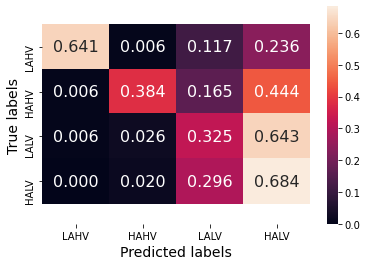

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.45, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
#plt.figure(figsize=(10,7))
#plt.savefig("hmwscalingall.png", dpi=300)
plt.show()